<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 38 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [2]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src

/content/MA574_Portfolio-Valuation-and-Risk-Management/src


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
Apple = pd.read_csv('AAPL.csv')
GOOG = pd.read_csv('GOOG.csv')
ETF= pd.read_csv('SPDR_S&P_500_ETF.csv')
Begin_Year2_index = 252

# 1.Using this daily data, calculate the daily log returns for year-1. Build a histogram of these daily returns.


<Figure size 432x288 with 0 Axes>

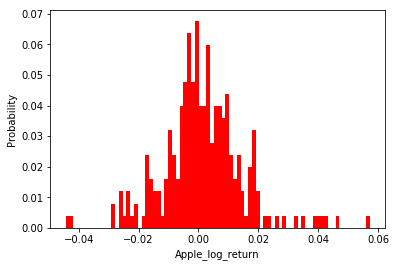

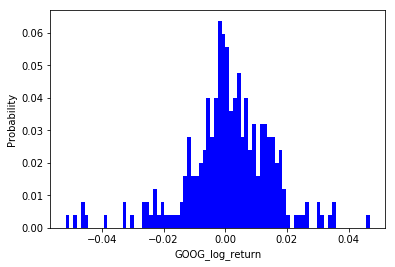

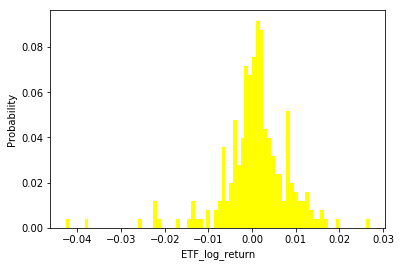

<Figure size 432x288 with 0 Axes>

In [50]:
#Problem 1
Log_return = pd.DataFrame(data = [np.log(Apple['Adj Close'][i]/Apple['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)],columns = ['Apple_log_return'])
Log_return['GOOG_log_return'] = np.array([np.log(GOOG['Adj Close'][i]/GOOG['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
Log_return['ETF_log_return'] = np.array([np.log(ETF['Adj Close'][i]/ETF['Adj Close'][i-1]) for i in range(1,Begin_Year2_index)])
counts_Apple, bins_Apple, bars_Apple = plt.hist(Log_return['Apple_log_return'],bins = 80,color = 'red', weights = [1./len(Log_return['Apple_log_return'])]*len(Log_return['Apple_log_return']))
plt.xlabel('Apple_log_return')
plt.ylabel('Probability')
plt.figure()
counts_GOOG, bins_GOOG, bars_GOOG = plt.hist(Log_return['GOOG_log_return'],bins = 80,color = 'blue', weights = [1./len(Log_return['GOOG_log_return'])]*len(Log_return['GOOG_log_return']))
plt.xlabel('GOOG_log_return')
plt.ylabel('Probability')
plt.figure()
counts_ETF, bins_ETF, bars_ETF = plt.hist(Log_return['ETF_log_return'],bins = 80,color = 'yellow', weights = [1./len(Log_return['ETF_log_return'])]*len(Log_return['ETF_log_return']))
plt.xlabel('ETF_log_return')
plt.ylabel('Probability')
plt.figure()

# 2.Fit a normal distribution to your year-1 daily log-returns.

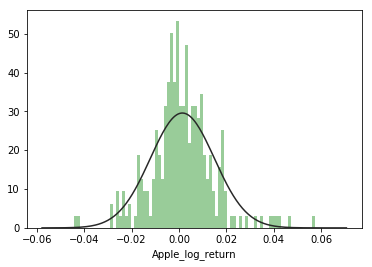

In [55]:
sns.distplot(Log_return['Apple_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'g')

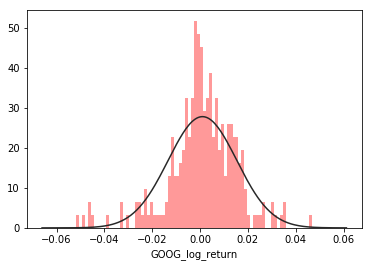

In [56]:
sns.distplot(Log_return['GOOG_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm, color = 'r')

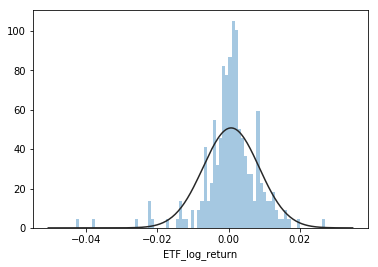

In [54]:
sns.distplot(Log_return['ETF_log_return'],bins = 80,hist = True,kde = False, fit = stats.norm)

# 8. Use all of the above to argue whether or not it is reasonable to assume that each of your year-1 log returns samples come from a normal distribution and your other distribution of choice. Use an appropriate hypothesis test to support your argument.


- Firstly, we use Kolmogorov-Smirnov test to test if this samples come from a normal distribution or not. we choose the $\alpha = 0.05$

In [87]:
stats.norm.fit(Log_return['Apple_log_return']) #fit Apple log return to norm-distribution

(0.00142565791208483, 0.013485239197559874)

In [88]:
kstest(Log_return['Apple_log_return'], 'norm',(0.00142565791208483, 0.013485239197559874,))

KstestResult(statistic=0.07406149688512817, pvalue=0.12114913491120463)

pvalue > $\alpha$, so we cannot reject the hypothesis that the Apple log return came from the normal distribution at $\alpha = 0.05$

In [91]:
stats.norm.fit(Log_return['GOOG_log_return']) #fit GOOG log return to norm-distribution

(0.0010121799346079724, 0.014369178495478523)

In [92]:
kstest(Log_return['GOOG_log_return'], 'norm',(0.0010121799346079724, 0.014369178495478523,))

KstestResult(statistic=0.09692579194369585, pvalue=0.01668202441116732)

pvalue <  α , so we reject the hypothesis that the GOOG log return came from the normal distribution at  α=0.05

In [93]:
stats.norm.fit(Log_return['ETF_log_return'])

(0.0007258024037359578, 0.007858031038307288)

In [94]:
kstest(Log_return['ETF_log_return'], 'norm',(0.0007258024037359578, 0.007858031038307288,))

KstestResult(statistic=0.11880318824456795, pvalue=0.0015219427448299621)

pvalue <  α , so we reject the hypothesis that the ETF log return came from the normal distribution at  α=0.05

- Secondly, we use Kolmogorov-Smirnov test to test if this samples come from a t-distribution or not. we choose the $\alpha = 0.05$

In [78]:
stats.t.fit(Log_return['Apple_log_return']) #fit Apple log return to t-distribution

(3.555111449512162, 0.0010963014930051983, 0.009468477910042364)

In [79]:
kstest(Log_return['Apple_log_return'],'t',(3.555111449512162, 0.0010963014930051983, 0.009468477910042364,))

KstestResult(statistic=0.034139501069563205, pvalue=0.9316875659375338)

pvalue >  α , so we cannot reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05

In [80]:
stats.t.fit(Log_return['GOOG_log_return']) #fit GOOG log return to t-distribution

(3.47643118831203, 0.0018083727431770778, 0.010020753758218828)

In [81]:
kstest(Log_return['GOOG_log_return'],'t',(3.47643118831203, 0.0018083727431770778, 0.010020753758218828,))

KstestResult(statistic=0.040817189564636314, pvalue=0.7971573995223605)

pvalue >  α , so we cannot reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05

In [82]:
stats.t.fit(Log_return['ETF_log_return']) #fit GOOG log return to t-distribution

(2.4950504819151447, 0.0011057246408057303, 0.004434521942797269)

In [83]:
kstest(Log_return['GOOG_log_return'],'t',(2.4950504819151447, 0.0011057246408057303, 0.004434521942797269,))

KstestResult(statistic=0.18158750423567738, pvalue=1.027862620849804e-07)

pvalue <  α , so we reject the hypothesis that the Apple log return came from the normal distribution at  α=0.05